In [ ]:
# 時系列データの解析の仕方ではないが一応時系列データ
# https://www.kaggle.com/code/hikmatullahmohammadi/playground-sep-2022-step-by-step
# https://www.kaggle.com/code/houssemaminetouihri/eda-tabular

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', index_col=0)

test = pd.read_csv('test.csv', index_col=0)

train

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      70128 non-null  object
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [4]:
bins = np.arange(0, 1050, 50)

sr = train['num_sold']

sr1 = pd.cut(sr, bins=bins)

vc = sr1.value_counts(sort=False)

print(vc)

(0, 50]         3923
(50, 100]      15823
(100, 150]     15922
(150, 200]      7397
(200, 250]      5640
(250, 300]      5773
(300, 350]      5211
(350, 400]      4402
(400, 450]      3240
(450, 500]      1776
(500, 550]       623
(550, 600]       210
(600, 650]        94
(650, 700]        39
(700, 750]        25
(750, 800]        11
(800, 850]         9
(850, 900]         5
(900, 950]         3
(950, 1000]        2
Name: num_sold, dtype: int64


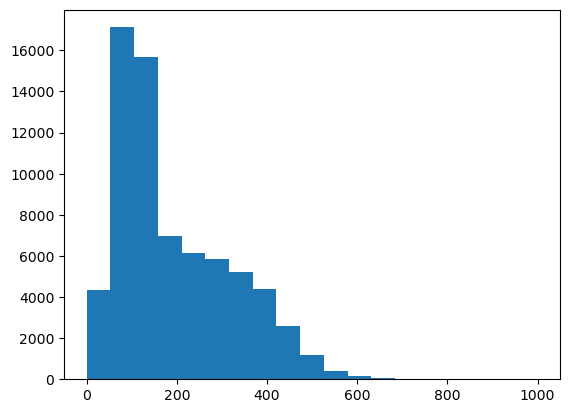

In [5]:
y , ind, pacthes = plt.hist(sr, bins=bins.size-2, range=(0,1000))
plt.show()

In [6]:
train_X = train.iloc[:,:-1]
train_y = train['num_sold']

In [7]:
#train_test_X = pd.concat([train_X, test], axis=0).reset_index(drop=True)
train_test_X = pd.concat([train_X, test], axis=0)
train_test_X

,date,country,store,product
row_id,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...
87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started


In [8]:
train_test_X['year'] = train_test_X['date'].apply(lambda x: x.split('-')[0])
train_test_X['month'] = train_test_X['date'].apply(lambda x: x.split('-')[1])
train_test_X['day'] = train_test_X['date'].apply(lambda x: x.split('-')[2])
train_test_X.drop('date', axis=1, inplace=True)
train_test_X

,country,store,product,year,month,day
row_id,,,,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,01,01
1,Belgium,KaggleMart,Kaggle Getting Started,2017,01,01
2,Belgium,KaggleMart,Kaggle Recipe Book,2017,01,01
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,01,01
4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,01,01
...,...,...,...,...,...,...
87643,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,31
87644,Spain,KaggleRama,Kaggle Advanced Techniques,2021,12,31
87645,Spain,KaggleRama,Kaggle Getting Started,2021,12,31


In [9]:
train_test_X[['year', 'month', 'day']] = train_test_X[['year', 'month', 'day']].astype('int')
train_test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  87648 non-null  object
 1   store    87648 non-null  object
 2   product  87648 non-null  object
 3   year     87648 non-null  int32 
 4   month    87648 non-null  int32 
 5   day      87648 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 3.7+ MB


In [10]:
def get_season(month):
    m = month
    if m in [1, 2, 3]: return 0
    elif m in [4, 5, 6]: return 1
    elif m in [7, 8, 9]: return 2
    else: return 3
train_test_X['season'] = train_test_X['month'].apply(get_season)
train_test_X

,country,store,product,year,month,day,season
row_id,,,,,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,1,1,0
1,Belgium,KaggleMart,Kaggle Getting Started,2017,1,1,0
2,Belgium,KaggleMart,Kaggle Recipe Book,2017,1,1,0
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,1,1,0
4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,1,1,0
...,...,...,...,...,...,...,...
87643,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,31,3
87644,Spain,KaggleRama,Kaggle Advanced Techniques,2021,12,31,3
87645,Spain,KaggleRama,Kaggle Getting Started,2021,12,31,3


In [ ]:
# train_test_X[''].value_counts() グラフより具体的に値がわかる

In [11]:
train_df = train_test_X.iloc[:train_y.shape[0], :]
train_df = train_df.join(train_y)
train_df

,country,store,product,year,month,day,season,num_sold
row_id,,,,,,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,1,1,0,663
1,Belgium,KaggleMart,Kaggle Getting Started,2017,1,1,0,615
2,Belgium,KaggleMart,Kaggle Recipe Book,2017,1,1,0,480
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,1,1,0,710
4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,1,1,0,240
...,...,...,...,...,...,...,...,...
70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2020,12,31,3,614
70124,Spain,KaggleRama,Kaggle Advanced Techniques,2020,12,31,3,215
70125,Spain,KaggleRama,Kaggle Getting Started,2020,12,31,3,158


In [12]:
# ヒートマップの値のみver
train_df.corr()['num_sold']

year        0.100914
month       0.001004
day         0.007803
season     -0.001857
num_sold    1.000000
Name: num_sold, dtype: float64

In [13]:
pd.crosstab(
    index=train_df['country'],
    columns=train_df['store']
)

store,KaggleMart,KaggleRama
country,,
Belgium,5844,5844
France,5844,5844
Germany,5844,5844
Italy,5844,5844
Poland,5844,5844
Spain,5844,5844


In [14]:
# グラフ省略ver
num_sold_year = train_df.groupby('year')['num_sold'].sum()
num_sold_year

year
2017    3112163
2018    3425424
2019    3232879
2020    3855193
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each year')

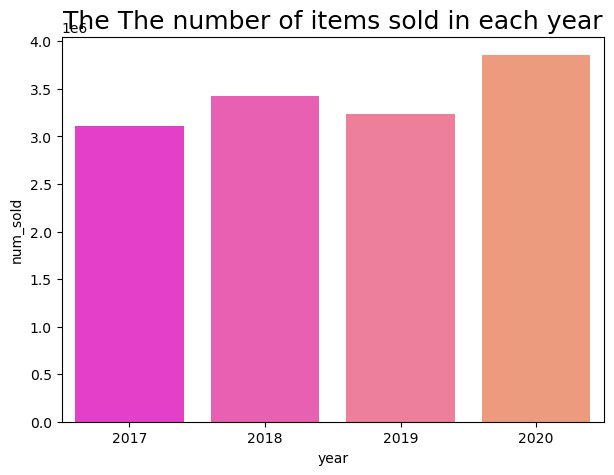

In [15]:
# 上記のグラフ化
plt.figure(figsize=(7, 5))
sns.set_palette('spring')
ax = sns.barplot(x=num_sold_year.index, y=num_sold_year)
ax.set_title('The The number of items sold in each year', fontdict={'fontsize':18})

In [ ]:
# modeling

In [16]:
train_test_X

,country,store,product,year,month,day,season
row_id,,,,,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,1,1,0
1,Belgium,KaggleMart,Kaggle Getting Started,2017,1,1,0
2,Belgium,KaggleMart,Kaggle Recipe Book,2017,1,1,0
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,1,1,0
4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,1,1,0
...,...,...,...,...,...,...,...
87643,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,2021,12,31,3
87644,Spain,KaggleRama,Kaggle Advanced Techniques,2021,12,31,3
87645,Spain,KaggleRama,Kaggle Getting Started,2021,12,31,3


In [17]:
for i in train_test_X.select_dtypes('object').columns:
    train_test_X[i], _ = train_test_X[i].factorize()
train_test_X.dtypes

country    int64
store      int64
product    int64
year       int32
month      int32
day        int32
season     int64
dtype: object

In [18]:
train_df_X = train_test_X.iloc[:train_y.shape[0], :]
test_df = train_test_X.iloc[train_y.shape[0]:, :]
train_df_X.shape

(70128, 7)

In [19]:
X = train_df_X.copy()
y = train_y
test_df = test_df

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

In [22]:
model = ExtraTreesRegressor(random_state=10)
model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=10)

In [23]:
y_pred = model.predict(X_test)
y_pred = np.array(y_pred, dtype='int')

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
m_abs_e = mean_absolute_error(y_test, y_pred)
print("RMSE: ", rmse)
print('Mean absolute error: ', m_abs_e)

RMSE:  22.989572599834613
Mean absolute error:  14.958333333333334


In [25]:
def smape(A, F):
    tmp = 2 * np.abs(F - A) / (np.abs(A) + np.abs(F))
    len_ = np.count_nonzero(~np.isnan(tmp))
    if len_ == 0 and np.nansum(tmp) == 0: # Deals with a special case
        return 100
    return 100 / len_ * np.nansum(tmp)
smape_ = smape(y_test, y_pred)
print('sMAPE: ', smape_)

sMAPE:  7.626231751570862


In [26]:
# train the model with entire train dataset
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=10)
model.fit(X, y)

ExtraTreesRegressor(random_state=10)

In [27]:
result = model.predict(test_df)
dct = {
    'row_id': test_df.index,
    'num_sold': result
}
submission = pd.DataFrame(dct)
submission.to_csv('./submission.csv', index=False)
print('DONE:)')

DONE:)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [30]:
model_1=LinearRegression()
model_2=Lasso()
model_3=Ridge()
model_4=DecisionTreeRegressor(random_state=0)

model_5=VotingRegressor([('LinearRegeression',model_1),('Lasso',model_2),('Ridge',model_3),("DecisionTreeRegressor",model_4)])

In [31]:
for model in (model_1,model_2,model_3,model_4,model_5):
    model.fit(X,y)
    print(model.__class__.__name__,model.score(X,y))

LinearRegression 0.631046535120307
Lasso 0.6305324896701902
Ridge 0.6310465333159598
DecisionTreeRegressor 1.0
VotingRegressor 0.7924314587722031
